# Laplacian eigenmaps and spectral clustering

In [1]:
import numpy as np
import pandas as pd
import pygsp
import matplotlib as mpl
import matplotlib.pylab as plt

from utils import assign_party_to_names

In [6]:
# Get information from the 50th legislature
adjacency = np.load('../data/adjacency.npy')
node_indices = pd.read_csv('../data/node_idx_cluster.csv', sep=',')
name_with_party = assign_party_to_names('../data/Ratsmitglieder_1848_FR.csv', node_indices)
party_to_be_plotted = ['UDC','PSS','PDC','pvl','PLR','PES','PBD']
party_colors = ['royalblue','r', 'orange', 'g', 'cyan', 'forestgreen', 'yellow']
party_color_map = dict((key, value) for (key, value) in zip(party_to_be_plotted, party_colors))

member_colors = []
member_party = name_with_party['PartyAbbreviation'].values
abbreviations = []
for abbr in member_party:
    try:
        colorname = party_color_map[abbr]
        abbreviations.append(abbr)
    except KeyError:
        colorname = 'gray'
        abbreviations.append('Other')
    member_colors.append(colorname)
    
name_with_party.head()

,CouncillorName,node_idx,CouncillorId,PartyAbbreviation
0,Thorens Goumaz Adèle,0,3907,PES
1,Marra Ada,1,3923,PSS
2,Glauser-Zufferey Alice,2,3883,UDC
3,Moser Tiana Angelina,3,3897,pvl
4,Rickli Natalie,4,3902,UDC


In [3]:
G = pygsp.graphs.Graph(W=adjacency)
G.compute_laplacian(lap_type='normalized')
eigvals, eigvecs = np.linalg.eigh(G.L.toarray())
x_coords = -eigvecs[:,1]
y_coords = -eigvecs[:,2]

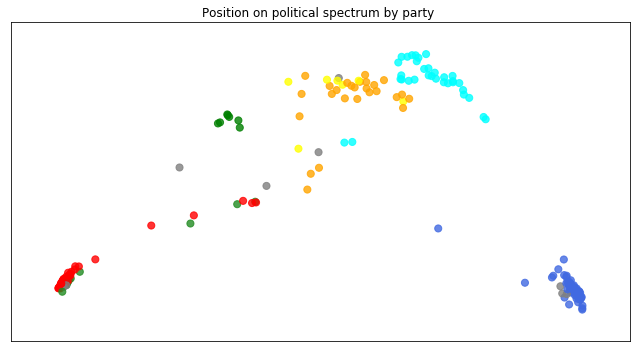

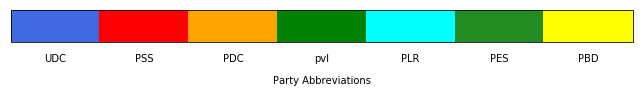

In [4]:
# Scatter plot of the council members, colored by party affiliation
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.scatter(x_coords, y_coords, c=member_colors, s=50, alpha=0.8)
ax.set_title('Position on political spectrum by party ')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
fig.tight_layout()

fig = plt.figure(figsize=(9.6, 3))
ax = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# Plot color dictionary for the party abbreviations
cmap = mpl.colors.ListedColormap(party_colors)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                 ticks=range(len(party_colors)),
                                 spacing='uniform',
                                 orientation='horizontal')

cbar.ax.get_xaxis().set_ticks([])
for j, lab in enumerate(party_to_be_plotted):
    cbar.ax.text((2 * j + 1) / 14.0, -.5, lab, ha='center', va='center', color='black')
cbar.ax.get_xaxis().labelpad = 15
cbar.ax.set_xlabel('Party Abbreviations')
cbar.ax.xaxis.set_label_coords(0.5, -1)

plt.show()